##**Informations**

A **chatbot** is a type of software that interacts with users through automated conversations on messaging platforms like Telegram. **Telegram**, a freeware and mostly open-source instant messaging platform, provides an ideal environment for developing projects that involve interaction with large volumes of user-generated data.

The objective of this project is to **build a data pipeline** that can ingest, process, store, and expose messages from a Telegram group, enabling data professionals to conduct in-depth analyses of group interactions. The proposed architecture is divided into two complementary parts: the transactional layer, where messages are generated and collected on Telegram, and the analytical layer, where the data is processed and analyzed on Amazon Web Services (AWS).

This activity was a challenge proposed by EBAC as the Final Project for the Big Data and Cloud Computing Module.

## **Set up Telegram**

**Step by step**

* Create a new bot using Telegram's BotFather.
* Start a new group and add your bot as a member.
* Promote the bot to administrator within the group.
* Disable the setting that allows the bot to be added to other groups.
* Use the Telegram Bot API to retrieve and process these messages.

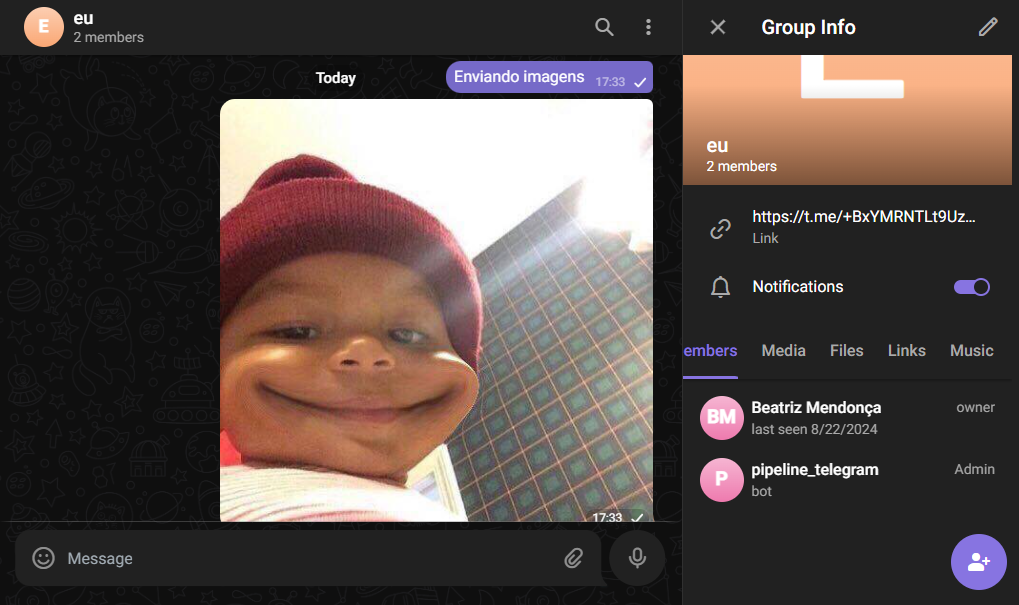

In [1]:
from getpass import getpass

token = getpass()

··········


In [16]:
import json

import requests

url = f'https://api.telegram.org/bot{token}'

In [17]:
response = requests.get(url=f'{url}/getMe')
print(f'{url}/getMe')

print(json.dumps(json.loads(response.text), indent=2))

https://api.telegram.org/bot7533027627:AAEsljviCi801oQQu-Qt3mG-Nw4-SPTHZBM/getMe
{
  "ok": true,
  "result": {
    "id": 7533027627,
    "is_bot": true,
    "first_name": "pipeline_telegram",
    "username": "pipeline_chatbox_bot",
    "can_join_groups": false,
    "can_read_all_group_messages": false,
    "supports_inline_queries": false,
    "can_connect_to_business": false,
    "has_main_web_app": false
  }
}


In [7]:
#Delete WebHook
url_webhook = f'https://api.telegram.org/bot{token}/deleteWebhook'

response = requests.get(url_webhook)
if response.status_code == 200:
    print('Webhook excluído com sucesso.')
else:
    print('Erro ao excluir webhook:', response.text)


Webhook excluído com sucesso.


In [19]:
get_updates_url = f'{url}/getUpdates'
response = requests.get(get_updates_url)
updates = response.json()

print(json.dumps(updates, indent=2))

{
  "ok": true,
  "result": [
    {
      "update_id": 602574974,
      "message": {
        "message_id": 12,
        "from": {
          "id": 6877828194,
          "is_bot": false,
          "first_name": "Beatriz",
          "last_name": "Mendon\u00e7a",
          "language_code": "en"
        },
        "chat": {
          "id": -1002210793670,
          "title": "eu",
          "type": "supergroup"
        },
        "date": 1724532498,
        "text": "Oi. Testando ap\u00f3s usar o WebHook"
      }
    }
  ]
}
